# LAB 5

**NAME** : **Shradha Anila Biju**

**Reg NO** : **2448050**



---



**Introduction:**

In this experiment, we focus on the simulation and identification of Autoregressive (AR), Moving Average (MA), and Autoregressive Moving Average (ARMA) processes using Python. The objective is to understand how these models behave in terms of their autocorrelation function (ACF) and partial autocorrelation function (PACF) patterns. By simulating data for processes of different orders, we can observe how the ACF and PACF plots change depending on the model type and order. This approach helps in developing the skill to identify the order of dependency in stationary time series models, which is a key step in time series analysis.



---



**Objectives:**

- To simulate AR, MA, and ARMA processes of various orders using Python.

- To study the stationarity properties of these processes.

- To generate and interpret ACF and PACF plots for the simulated series.

- To understand the characteristic cutoff and tail-off patterns in ACF and PACF for AR, MA, and ARMA models.

- To develop the ability to identify the order of stationary time series models based on their correlation structures.



---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:

# Utility function to plot ACF and PACF

def plot_acf_pacf(data, title_prefix, lags=20):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(data, lags=lags, ax=axes[0])
    axes[0].set_title(f"ACF of {title_prefix}")
    plot_pacf(data, lags=lags, ax=axes[1], method='ywm')
    axes[1].set_title(f"PACF of {title_prefix}")
    plt.show()

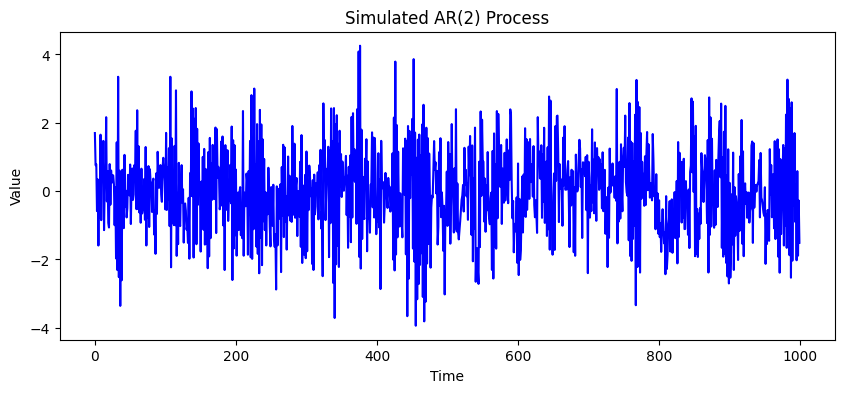

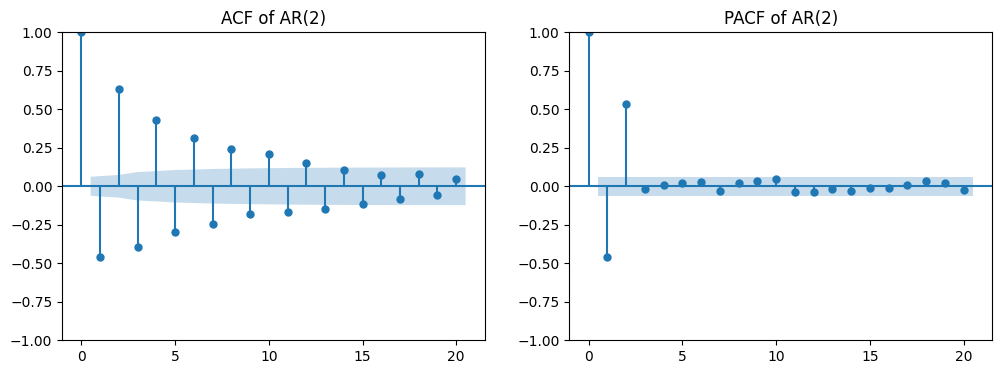

For AR(2): ACF tails off, PACF cuts off after lag 2.


In [ ]:

# 1. Simulate AR(2) process

# AR polynomial: 1 - phi1*L - phi2*L^2
ar_params = np.array([1, 0.2, -0.6])  # AR(2) coefficients
ma_params = np.array([1])  # MA(0)

ar2_process = ArmaProcess(ar=ar_params, ma=ma_params)
ar2_data = ar2_process.generate_sample(nsample=1000)

plt.figure(figsize=(10, 4))
plt.plot(ar2_data, color='blue')
plt.title("Simulated AR(2) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plot_acf_pacf(ar2_data, "AR(2)")

print("For AR(2): ACF tails off, PACF cuts off after lag 2.")



---



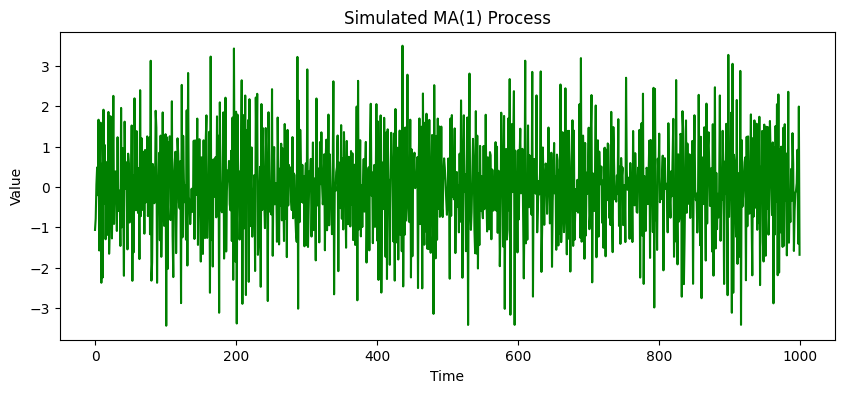

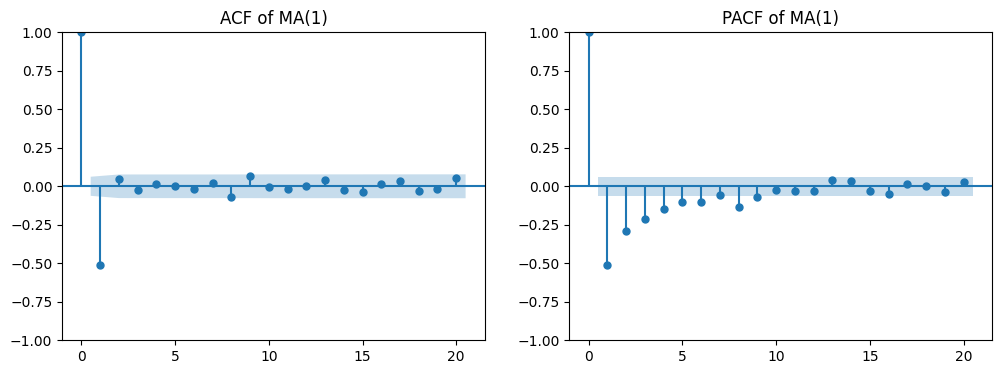

For MA(1): ACF cuts off after lag 1, PACF tails off.


In [ ]:

# 2. Simulate MA(1) process

# MA polynomial: 1 + theta1*L
ar_params = np.array([1])
ma_params = np.array([1, -0.8])  # MA(1)

ma1_process = ArmaProcess(ar=ar_params, ma=ma_params)
ma1_data = ma1_process.generate_sample(nsample=1000)

plt.figure(figsize=(10, 4))
plt.plot(ma1_data, color='green')
plt.title("Simulated MA(1) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plot_acf_pacf(ma1_data, "MA(1)")

print("For MA(1): ACF cuts off after lag 1, PACF tails off.")



---



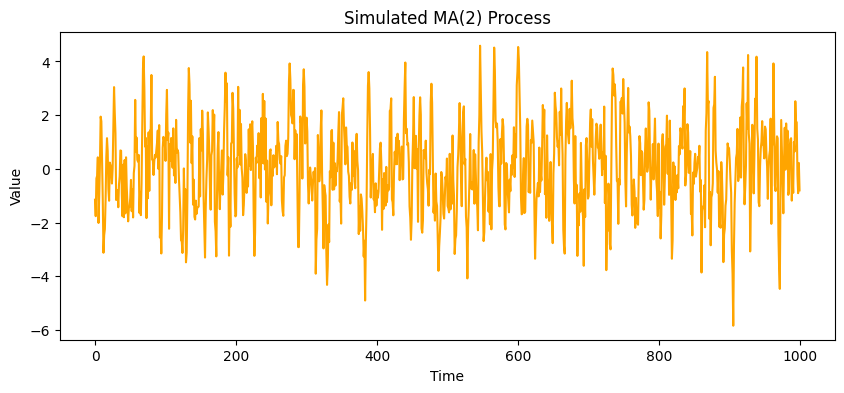

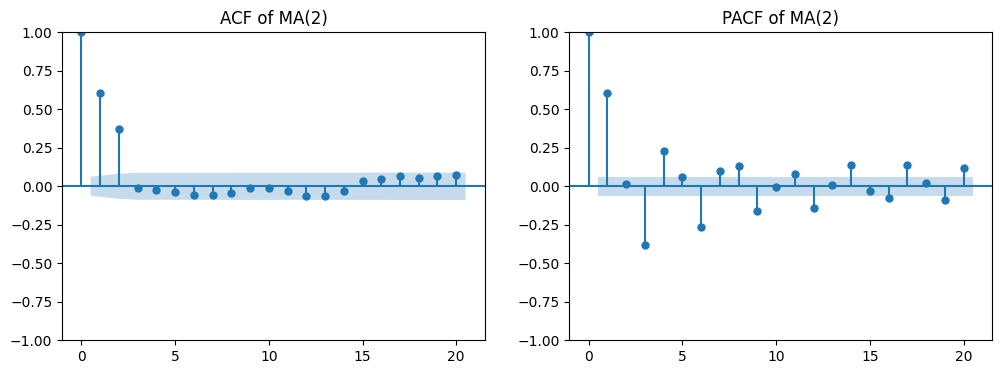

For MA(2): ACF cuts off after lag 2, PACF tails off.


In [ ]:

# 3. Simulate MA(2) process

ar_params = np.array([1])
ma_params = np.array([1, 0.8, 1.0])  # MA(2)

ma2_process = ArmaProcess(ar=ar_params, ma=ma_params)
ma2_data = ma2_process.generate_sample(nsample=1000)

plt.figure(figsize=(10, 4))
plt.plot(ma2_data, color='orange')
plt.title("Simulated MA(2) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plot_acf_pacf(ma2_data, "MA(2)")

print("For MA(2): ACF cuts off after lag 2, PACF tails off.")



---



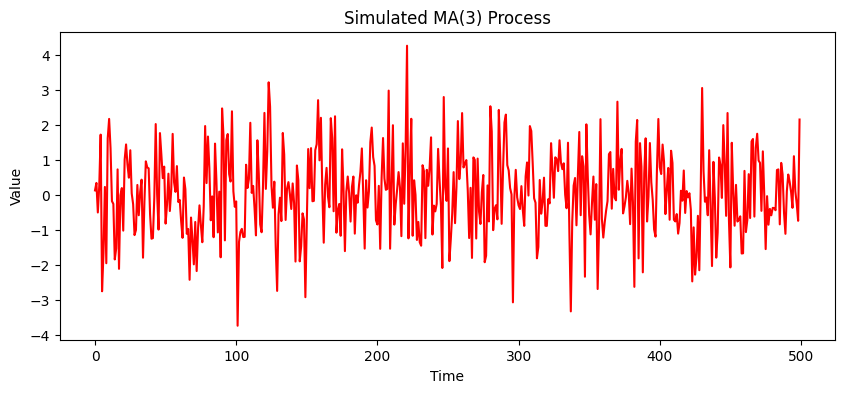

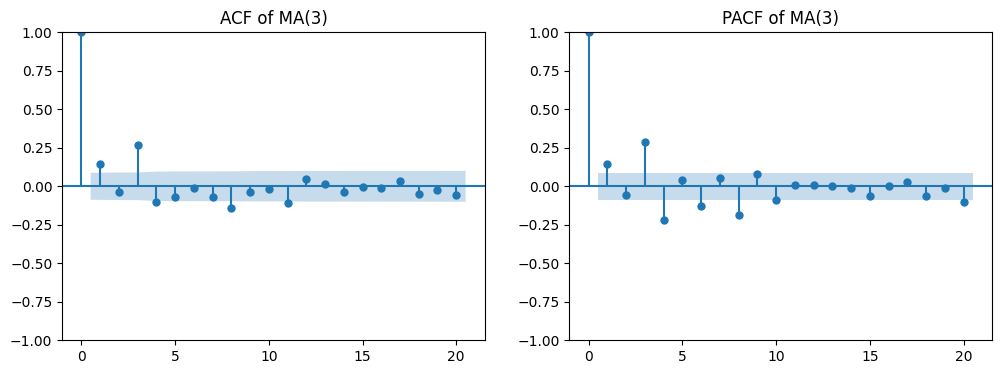

For MA(3): ACF cuts off after lag 3, PACF tails off.
MA processes are always stationary since they are a linear combination of white noise.


In [ ]:

# 4. Simulate MA(3) process

ar_params = np.array([1])
ma_params = np.array([1, 0.5, -0.3, 0.4])  # MA(3)

ma3_process = ArmaProcess(ar=ar_params, ma=ma_params)
ma3_data = ma3_process.generate_sample(nsample=500)

plt.figure(figsize=(10, 4))
plt.plot(ma3_data, color='red')
plt.title("Simulated MA(3) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plot_acf_pacf(ma3_data, "MA(3)")

print("For MA(3): ACF cuts off after lag 3, PACF tails off.")
print("MA processes are always stationary since they are a linear combination of white noise.")




---



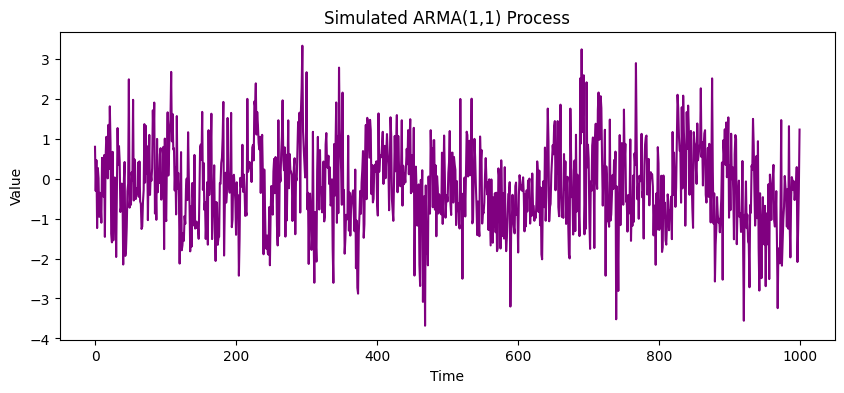

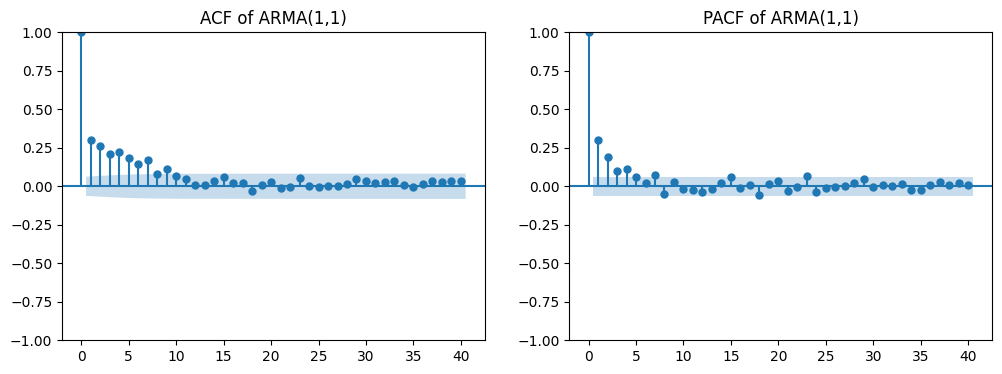

For ARMA(1,1): Both ACF and PACF tail off, so order is not easily determined from plots.


In [ ]:

# 5. Simulate ARMA(1,1) process

ar_params = np.array([1, -0.9])  # AR(1) with phi=0.9
ma_params = np.array([1, -0.7])  # MA(1) with theta=-0.7

arma11_process = ArmaProcess(ar=ar_params, ma=ma_params)
arma11_data = arma11_process.generate_sample(nsample=1000)

plt.figure(figsize=(10, 4))
plt.plot(arma11_data, color='purple')
plt.title("Simulated ARMA(1,1) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plot_acf_pacf(arma11_data, "ARMA(1,1)", lags=40)

print("For ARMA(1,1): Both ACF and PACF tail off, so order is not easily determined from plots.")




---



**Conclusion:**

The techniques demonstrated help in simulating AR, MA, and ARMA processes and observing their ACF and PACF structures. From the plots, we see that for an AR(p) process, the ACF tails off and the PACF cuts off after lag p. For an MA(q) process, the ACF cuts off after lag q and the PACF tails off. For ARMA(p, q) processes, both the ACF and PACF tail off, making order identification harder. This method allows us to understand the dependency structure of stationary time series models.